# 1. Load tree

We first load the tree (newick format) which was downloaded from the website <https://filogeneti.ca/covizu/>.

In [59]:
library(ape)
library(ggtree)
library(treeio)
library(tidyverse)
library(dplyr)

tree <- read.newick("timetree.nwk")

tree


Phylogenetic tree with 1720 tips and 517 internal nodes.

Tip labels:
  XS, XF, BA.1.10, BA.1.13.1, BA.1.7, BA.1.12, ...
Node labels:
  NODE_0000001, NODE_0000458, NODE_0000459, NODE_0000460, NODE_0000462, NODE_0000465, ...

Rooted; includes branch lengths.

# 2. Load metadata

Next we load some metadata from a CSV file, also downloaded from.

In [3]:
metadata_df <- read.table("lineage_stats.csv", header=TRUE, sep=",")
metadata_df$min.coldate <- as.Date(metadata_df$min.coldate, format = "%Y-%m-%d")
metadata_df$max.coldate <- as.Date(metadata_df$max.coldate, format = "%Y-%m-%d")
metadata_df$mean.coldate <- as.Date(metadata_df$mean.coldate, format = "%Y-%m-%d")

head(metadata_df)

,lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate
,<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>
1,XS,69.71,16.42,21,9,2022-01-19,2022-03-07,2022-02-21
2,XF,64.24,12.62,21,7,2022-01-13,2022-02-14,2022-01-26
3,BA.1.10,63.62,11.90,856,545,2021-11-26,2022-03-31,2022-01-28
4,BA.1.13.1,66.24,14.35,1542,882,2021-12-12,2022-04-10,2022-01-31
5,BA.1.7,63.52,12.02,177,109,2021-12-11,2022-03-15,2022-01-25
6,BA.1.12,64.87,13.26,915,570,2021-11-22,2022-04-25,2022-01-26


# 3. Add variant information

Now we add variant information to a separate column (e.g., Delta, Omicron, etc) based on the lineage identifiers. These are derived from <https://www.who.int/activities/tracking-SARS-CoV-2-variants> and <https://cov-lineages.org/lineage_list.html>.

In [42]:
tree_labels <- metadata_df$lineage
node_ids <- nodeid(tree, tree_labels)

lineage_df <- cbind(metadata_df, node_ids)
lineage_df

lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate,Variant,node_ids
<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>,<chr>,<int>
XS,69.71,16.42,21,9,2022-01-19,2022-03-07,2022-02-21,NA,1
XF,64.24,12.62,21,7,2022-01-13,2022-02-14,2022-01-26,NA,2
BA.1.10,63.62,11.90,856,545,2021-11-26,2022-03-31,2022-01-28,Omicron,3
BA.1.13.1,66.24,14.35,1542,882,2021-12-12,2022-04-10,2022-01-31,Omicron,4
BA.1.7,63.52,12.02,177,109,2021-12-11,2022-03-15,2022-01-25,Omicron,5
BA.1.12,64.87,13.26,915,570,2021-11-22,2022-04-25,2022-01-26,Omicron,6
BA.1.13,63.50,12.72,1342,998,2021-11-18,2022-04-22,2022-01-14,Omicron,7
BA.1.17,63.78,11.68,24096,16024,2021-11-20,2022-05-11,2022-02-03,Omicron,8
BA.1.17.2,65.52,13.48,67635,39398,2021-11-17,2022-05-20,2022-02-02,Omicron,9


In [47]:
is_delta <- str_detect(tree_labels, "^B\\.1\\.617\\.2$|^AY\\.")
is_omicron <- str_detect(tree_labels, "^B\\.1\\.1\\.529$|^BA\\.")
is_alpha <- str_detect(tree_labels, "^B\\.1\\.1\\.7$|^Q\\.")
is_beta <- str_detect(tree_labels, "^B\\.1\\.351$|^B\\.1\\.351\\.")
is_gamma <- str_detect(tree_labels, "^B\\.1\\.1\\.28$|P\\.")

lineage_df[is_delta, "Variant"] <- "Delta"
lineage_df[is_omicron, "Variant"] <- "Omicron"
lineage_df[is_alpha, "Variant"] <- "Alpha"
lineage_df[is_beta, "Variant"] <- "Beta"
lineage_df[is_gamma, "Variant"] <- "Gamma"

names(lineage_df)[names(lineage_df) == "node_ids"] <- "node"

table(lineage_df["Variant"])


  Alpha    Beta   Delta   Gamma Omicron 
      9       5     243      31      98 

In [48]:
na.omit(lineage_df[lineage_df["Variant"] == "Alpha",])

,lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate,Variant,node
,<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>,<chr>,<int>
1549,Q.2,42.37,9.52,1003,476,2020-12-16,2022-05-06,2021-04-15,Alpha,1549
1550,B.1.1.7,39.21,0.58,873018,431943,2020-11-24,2022-04-25,2021-07-12,Alpha,1550
1551,Q.1,36.73,3.37,5881,2806,2021-01-08,2021-07-30,2021-04-23,Alpha,1551
1552,Q.5,41.17,3.23,29,14,2021-06-28,2021-08-11,2021-07-02,Alpha,1552
1553,Q.4,39.54,7.15,1423,901,2021-01-10,2021-08-17,2021-04-08,Alpha,1553
1554,Q.3,41.21,7.52,3673,1883,2020-12-29,2021-09-17,2021-04-28,Alpha,1554
1555,Q.7,43.37,10.00,731,397,2021-01-29,2021-11-04,2021-04-23,Alpha,1555
1556,Q.6,41.14,4.65,126,80,2021-03-02,2021-08-12,2021-06-10,Alpha,1556
1557,Q.8,41.21,4.43,222,204,2021-03-07,2021-10-30,2021-06-14,Alpha,1557


# 4. Join metadata to tree

In [49]:
tree_metadata <- full_join(tree, lineage_df, by = "node")
tree_metadata

'treedata' S4 object'.

...@ phylo:

Phylogenetic tree with 1720 tips and 517 internal nodes.

Tip labels:
  XS, XF, BA.1.10, BA.1.13.1, BA.1.7, BA.1.12, ...
Node labels:
  NODE_0000001, NODE_0000458, NODE_0000459, NODE_0000460, NODE_0000462,
NODE_0000465, ...

Rooted; includes branch lengths.

with the following features available:
  'lineage', 'mean.diffs', 'clock.residual', 'num.cases', 'num.variants',
'min.coldate', 'max.coldate', 'mean.coldate', 'Variant'.

# The associated data tibble abstraction: 2,237 × 12
# The 'node', 'label' and 'isTip' are from the phylo tree.
    node label    isTip lineage mean.diffs clock.residual num.cases num.variants
   <int> <chr>    <lgl> <chr>        <dbl>          <dbl>     <int>        <int>
 1     1 XS       TRUE  XS            69.7           16.4        21            9
 2     2 XF       TRUE  XF            64.2           12.6        21            7
 3     3 BA.1.10  TRUE  BA.1.10       63.6           11.9       856          545
 4     4 BA.1.13

# 5. Get most recent date for scaling by time

In [52]:
most_recent_date <- max(lineage_df[["min.coldate"]], na.rm = TRUE)

print(most_recent_date)
lineage_df[lineage_df[["min.coldate"]] == most_recent_date,]

[1] "2022-03-09"


,lineage,mean.diffs,clock.residual,num.cases,num.variants,min.coldate,max.coldate,mean.coldate,Variant,node
,<chr>,<dbl>,<dbl>,<int>,<int>,<date>,<date>,<date>,<chr>,<int>
104,BA.2.9.1,79.07,21.93,323,134,2022-03-09,2022-05-18,2022-04-21,Omicron,104


# 6. Draw tree

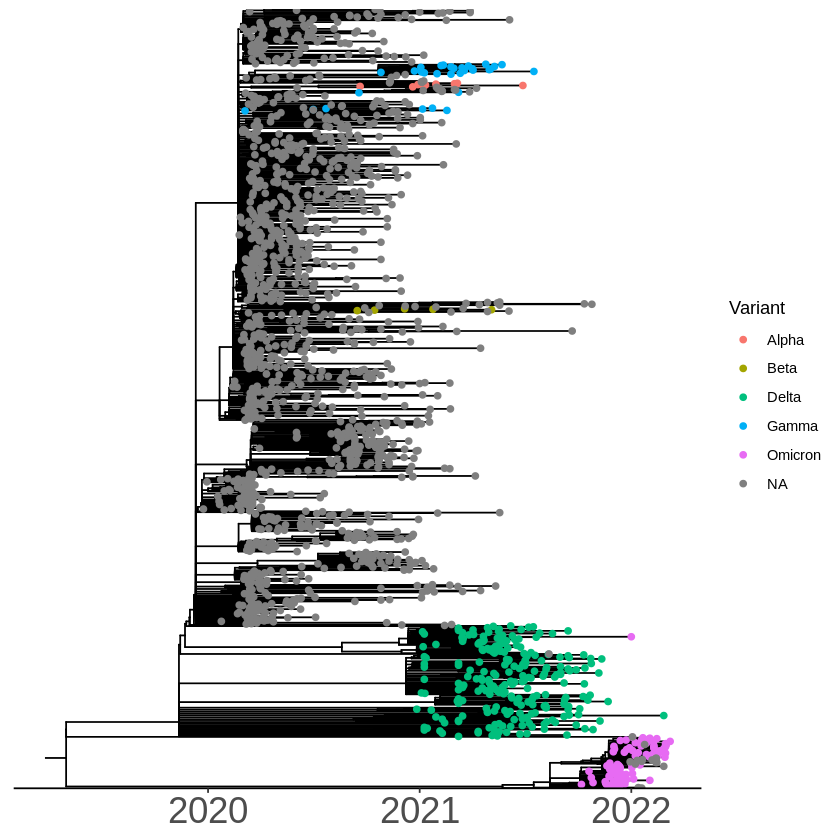

In [63]:
# highlight_color1 <- "#d95f02"
highlight_color1 <- "#a50f15"
# highlight_color2 <- "#7570b3"
highlight_color2 <- "#08519c"
default_color = "black"

node_size <- 3
g <- ggtree(tree_metadata, mrsd=most_recent_date, ladderize=FALSE) +
         geom_tippoint(aes(color=Variant)) +
         geom_rootedge(rootedge=0.1) +
         theme_tree2(axis.text.x=element_text(size=22))
g

# 7. Save figure to file

In [64]:
ggsave(filename="variants-tree.pdf") 

Saving 6.67 x 6.67 in image

